# Simulation en biologie
**Lundi 24/09** - Bruno Toupance

## Exercice 2

In [7]:
g <- function(x){
    return( (exp(x)-1) / (exp(1)-1) )
}

In [8]:
valX <- seq(from=0, to=2, len=1000)
valY = g(valX)

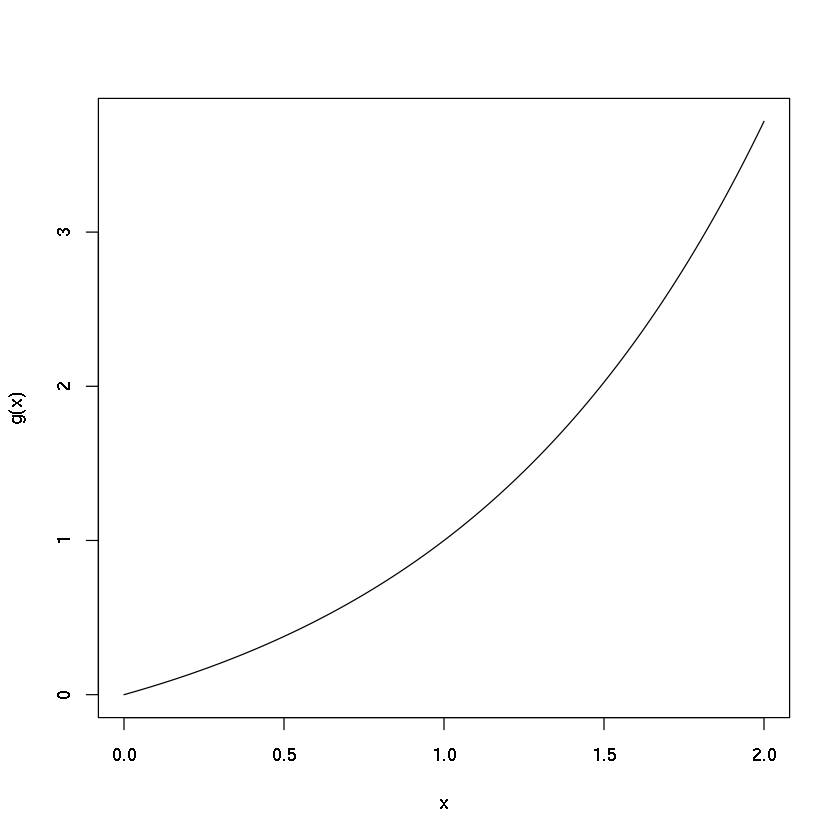

In [11]:
plot(valX, valY, xlab='x', ylab='g(x)', type='l')

In [142]:
# Valeur à trouver de l'intégration
# fonction integrate
integrate(g, lower = 0, upper = 2)
# valeur exacte
Iexact = (exp(2)-3)/(exp(1)-1)

2.554328 with absolute error < 2.8e-14

In [170]:
# 2 : Tirage noir ou blanc
n = 1000
m = g(2)
tirageX = runif(n, min=0, max=2)
tirageY = runif(n, min=0, max=m)
ns = sum(g(tirageX)-tirageY >= 0)
I = m*(2-0)*ns/n
print(I)
1/abs(Iexact - I)

[1] 2.454066


[1] 9.973828

In [171]:
# 3 : MC simple
I = (2-0)/n*sum(g(tirageX))
print(I)
1/abs(Iexact - I)

[1] 2.50542


[1] 20.44651

In [172]:
# 4 : MC suivant l'importance
tirageX = rbeta(n, 2, 1)*2
h <- function(x){
    return(g(x)/(dbeta(x/2, 2, 1)/2))
}
1/abs(Iexact - mean(h(tirageX)))

[1] 32.51497

In [210]:
# 5 : Amelioration
ncpp = 2
tirageX = rbeta(n, 2, 1, ncp=ncpp)*2
h <- function(x){
    return(g(x)/(dbeta(x/2, 2, 1, ncp=ncpp)/2))
}
1/abs(Iexact - mean(h(tirageX)))

[1] 98.14631

In [180]:
# 5 : Amelioration BIS
h <- function(x, alpha, beta, ncpp){
    return(g(x)/(dbeta(x/2, alpha, beta, ncp=ncpp)/2))
}

fn <- function(par){
    ncpp = par[1]
    alpha = par[2]
    beta = par[3]
    score = c()
    for(i in 1:100){
        tirageX = rbeta(n, alpha, beta, ncp=ncpp)*2
        score = c(score, abs(Iexact - mean(h(tirageX, alpha, beta, ncp=ncpp))))
    }
    return(mean(score))
}

In [246]:
optimal_par = suppressWarnings(optim(c(0, 2, 1), fn))$par

ERROR: Error in h(tirageX, alpha, beta, ncp = ncpp): arguments inutilisés (alpha, beta, ncp = ncpp)


In [245]:
ncpp = 0.1386005
alpha = 2.3860830
beta = 0.9286496
tirageX = rbeta(n, alpha, beta, ncp=ncpp)*2
h <- function(x){
    return(g(x)/(dbeta(x/2, alpha, beta, ncp=ncpp)/2))
}
mean(h(tirageX))

[1] 2.554805

In [182]:
help(optim)

In [115]:
x = seq(0, 1, len=100)
x

[1] 0.00000000 0.01010101 0.02020202 0.03030303 0.04040404 0.05050505
  [7] 0.06060606 0.07070707 0.08080808 0.09090909 0.10101010 0.11111111
 [13] 0.12121212 0.13131313 0.14141414 0.15151515 0.16161616 0.17171717
 [19] 0.18181818 0.19191919 0.20202020 0.21212121 0.22222222 0.23232323
 [25] 0.24242424 0.25252525 0.26262626 0.27272727 0.28282828 0.29292929
 [31] 0.30303030 0.31313131 0.32323232 0.33333333 0.34343434 0.35353535
 [37] 0.36363636 0.37373737 0.38383838 0.39393939 0.40404040 0.41414141
 [43] 0.42424242 0.43434343 0.44444444 0.45454545 0.46464646 0.47474747
 [49] 0.48484848 0.49494949 0.50505051 0.51515152 0.52525253 0.53535354
 [55] 0.54545455 0.55555556 0.56565657 0.57575758 0.58585859 0.59595960
 [61] 0.60606061 0.61616162 0.62626263 0.63636364 0.64646465 0.65656566
 [67] 0.66666667 0.67676768 0.68686869 0.69696970 0.70707071 0.71717172
 [73] 0.72727273 0.73737374 0.74747475 0.75757576 0.76767677 0.77777778
 [79] 0.78787879 0.79797980 0.80808081 0.81818182 0.82828283 0.83838384
 [85] 0.84848485 0.85858586 0.86868687 0.87878788 0.88888889 0.89898990
 [91] 0.90909091 0.91919192 0.92929293 0.93939394 0.94949495 0.95959596
 [97] 0.96969697 0.97979798 0.98989899 1.00000000

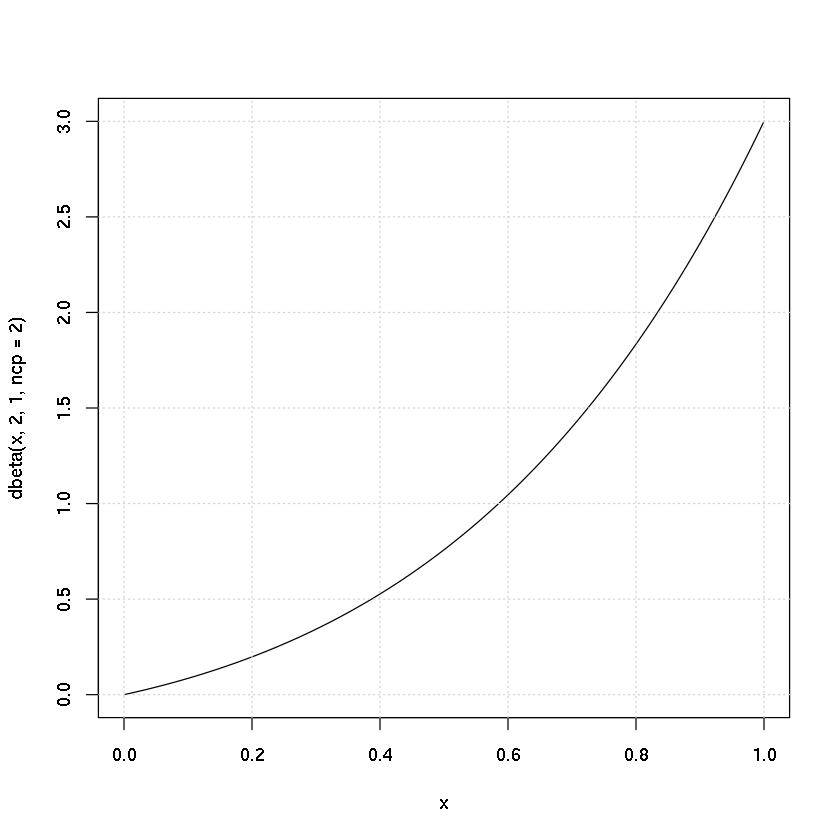

In [140]:
plot(x, dbeta(x, 2, 1, ncp=2), type='l')
grid()

In [139]:
help(dbeta)